In [750]:
%matplotlib inline

In [751]:
import os
import json
import torch
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from vr.utils import load_execution_engine
from vr.data import (ClevrDataset,
                     ClevrDataLoader)

In [752]:
def invert_dict(d):
    return {v: k for k, v in d.items()}

In [753]:
def gen_dataframe(root_results, data_name, method_list):
    split_list = ['valA', 'valB']
    accuracy_values = np.zeros((len(method_list), len(split_list)))

    for id_m_, method_ in enumerate(method_list):
        for id_s_, split_ in enumerate(split_list):
            try:
                file_output = h5py.File(os.path.join(root_results, data_name, 
                                                     '%s_output_%s.h5' % (method_, split_)), 'r')
            except:
                continue
            output_vals = file_output['correct'][:]     
            accuracy_values[id_m_, id_s_] = np.sum(output_vals) / output_vals.size
    df_ = pd.DataFrame(accuracy_values, columns=split_list, index=method_list)
    return df_

In [835]:
root_results = '' # path to results

# Plot train / test performance on seen and unseen

In [757]:
data_name = 'CoGenT'
network_name = 'vector'
file_name = [ '_0', '_1', '_2', '_3', ''] 

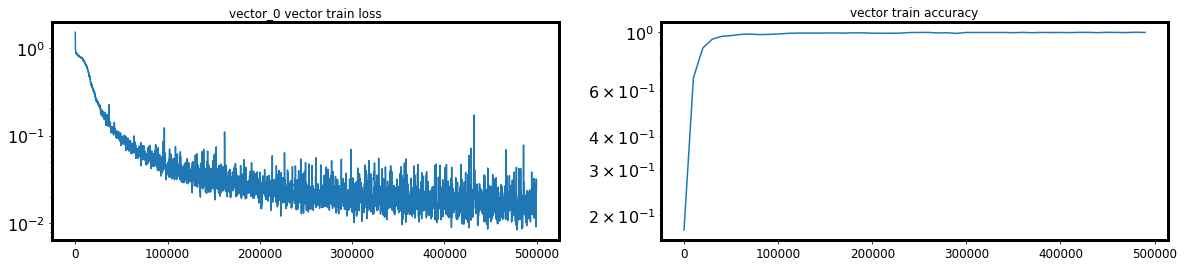

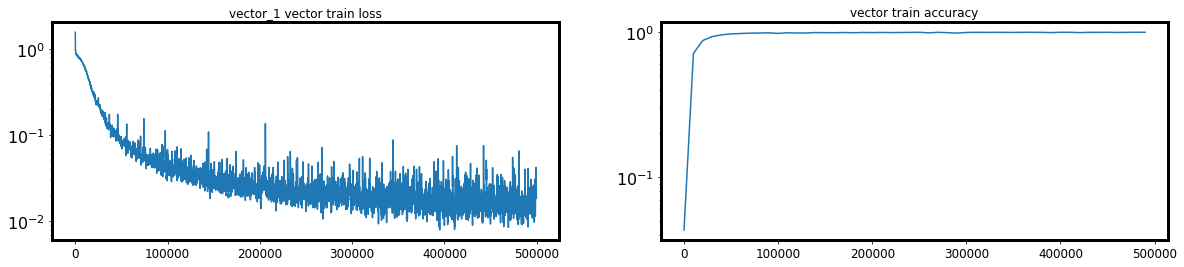

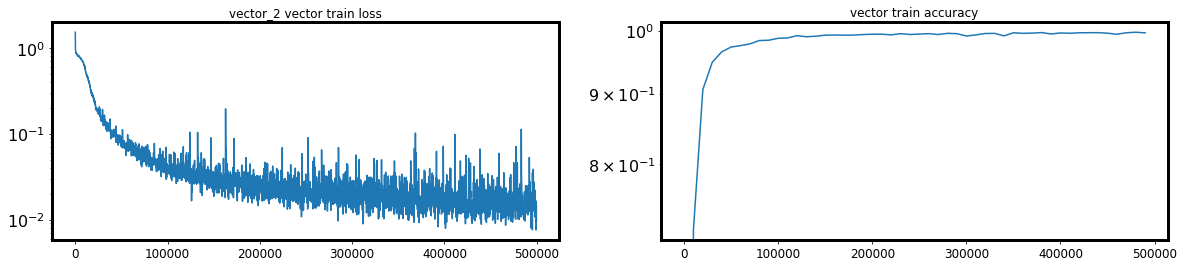

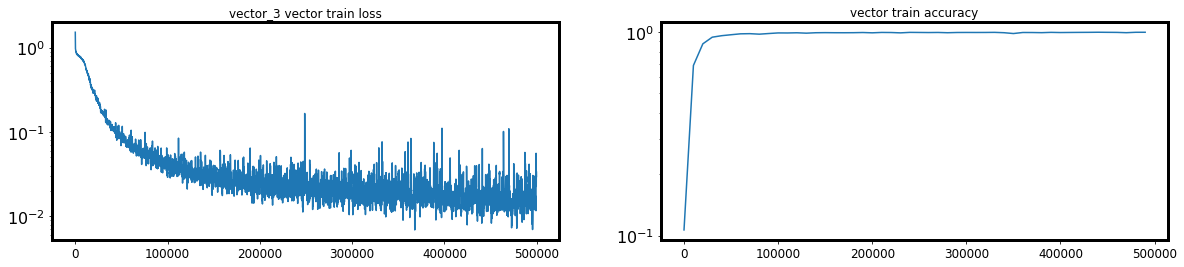

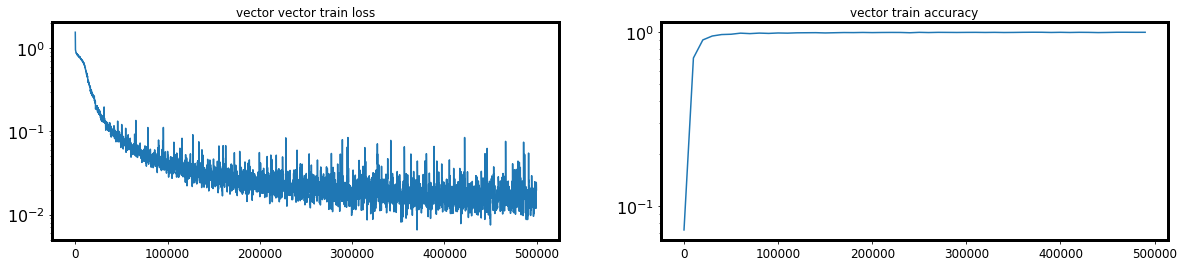

In [758]:
json_list = []
for f_ in file_name:
    json_file = json.load(open(os.path.join(root_results,
                                            data_name,
                                            network_name + f_ + '.json'),
                               'rb'))
    fig, ax = plt.subplots(figsize=(20,4), ncols=2, nrows=1)
    ax[0].set_title(network_name + f_ + ' %s train loss' % network_name)
    ax[1].set_title('%s train accuracy' % network_name)
    ax[0].semilogy(json_file['train_losses_ts'], json_file['train_losses'])
    ax[1].semilogy(json_file['val_accs_ts'], json_file['train_accs'])

##  Mean and std of different methods on valA and valB 

In [759]:
data_name = 'CoGenT'

#### Vector-NMN

In [760]:
method_list = ['vector', 'vector_0', 'vector_1', 'vector_2', 'vector_3']
df_vector = gen_dataframe(root_results, data_name, method_list) 
df_vector.mean(axis=0), df_vector.std(axis=0) 

(valA    0.980403
 valB    0.732364
 dtype: float64,
 valA    0.002178
 valB    0.002598
 dtype: float64)

#### Vector-NMN with modular image encoder

In [761]:
method_list = ['sep_stem_vector', 'vector_sep_stem_0', 'vector_sep_stem_1', 
               'vector_sep_stem_2', 'vector_sep_stem_3']
df_vector_sep_stem = gen_dataframe(root_results, data_name, method_list) 
df_vector_sep_stem.mean(axis=0), df_vector_sep_stem.std(axis=0) 

(valA    0.944395
 valB    0.773001
 dtype: float64,
 valA    0.003303
 valB    0.014912
 dtype: float64)

#### NMN architecture simple cell 

In [762]:
method_list = ['simpleModule_noFiLM', 'simpleModule_noFiLM_0', 'simpleModule_noFiLM_1', 
               'simpleModule_noFiLM_2', 'simpleModule_noFiLM_3']
df_simple_tensor = gen_dataframe(root_results, data_name, method_list) 
df_simple_tensor.mean(axis=0), df_simple_tensor.std(axis=0) 

(valA    0.975644
 valB    0.731207
 dtype: float64,
 valA    0.003455
 valB    0.006548
 dtype: float64)

#### NMN architecture simple cell with modular image encoder

In [763]:
method_list = ['simple_nmn_attempt', 'simple_nmn_attempt_0', 'simple_nmn_attempt_1', 
               'simple_nmn_attempt_2', 'simple_nmn_attempt_3']
df_simple_tensor_sep_stem = gen_dataframe(root_results, data_name, method_list) 
df_simple_tensor_sep_stem.mean(axis=0), df_simple_tensor_sep_stem.std(axis=0) 

(valA    0.972241
 valB    0.738571
 dtype: float64,
 valA    0.003180
 valB    0.003705
 dtype: float64)

#### Tensor NMN

In [764]:
method_list = ['tensor', 'tensor_0', 'tensor_1', 'tensor_2', 'tensor_3']
df_tensor = gen_dataframe(root_results, data_name, method_list)
df_tensor.mean(axis=0), df_tensor.std(axis=0) 

(valA    0.978619
 valB    0.727272
 dtype: float64,
 valA    0.001371
 valB    0.005234
 dtype: float64)

#### FiLM network

In [765]:
method_list = ['FiLM', 'FiLM_0', 'FiLM_1', 'FiLM_2', 'FiLM_3']
df_FiLM = gen_dataframe(root_results, data_name, method_list) 
df_FiLM.mean(axis=0), df_FiLM.std(axis=0) 

(valA    0.974877
 valB    0.759655
 dtype: float64,
 valA    0.002955
 valB    0.004417
 dtype: float64)

#### MAC with bn

In [766]:
method_list = ['with_bn/MAC_0', 'with_bn/MAC_1', 'with_bn/MAC_2', 'with_bn/MAC_3', 'with_bn/MAC_4']
df_mac_w_bn = gen_dataframe(root_results, data_name, method_list) 
df_mac_w_bn.mean(axis=0), df_mac_w_bn.std(axis=0) 

(valA    0.985009
 valB    0.746185
 dtype: float64,
 valA    0.002927
 valB    0.006762
 dtype: float64)

#### MAC

In [767]:
method_list = ['MAC_0', 'MAC_1', 'MAC_2', 'MAC_3', 'MAC_4']
df_mac = gen_dataframe(root_results, data_name, method_list) 
df_mac.mean(axis=0), df_mac.std(axis=0) 

(valA    0.985929
 valB    0.736483
 dtype: float64,
 valA    0.001160
 valB    0.007697
 dtype: float64)

## Performance per question type

In [774]:
# data dir -- path to the dataset

In [775]:
data_dir = os.path.join(os.path.dirname(root_results),
                        'dataset_visual_bias' if data_name=='CoGenT' else 'dataset/CLEVR_v1.0')
vocab = json.load(open(os.path.join(data_dir, 'vocab.json'), 'rb'))
program_id_token = invert_dict(vocab['program_token_to_idx'])

In [776]:
val_q = h5py.File(os.path.join(data_dir, 'valB_questions.h5'),'r')
convert = lambda x: program_id_token[x]
vconvert = np.vectorize(convert)
programs = vconvert(val_q['programs'][:])
question_types = np.unique(programs[:,1])
question_types = np.sort(question_types)
bm = np.zeros((question_types.size, programs.shape[0]), dtype=bool)
for id_q_, q_ in enumerate(question_types):
    bm[id_q_] = (programs[:,1] == q_)

In [777]:
np.sum(programs[:, 0] != '<START>')

0

In [778]:
question_types

array(['count', 'equal_color', 'equal_integer', 'equal_material',
       'equal_shape', 'equal_size', 'exist', 'greater_than', 'less_than',
       'query_color', 'query_material', 'query_shape', 'query_size'],
      dtype='<U23')

In [779]:
questions = val_q['questions'][:]

In [780]:
indexes_ = []
for id_, p_ in enumerate(programs):
    if 'union' in p_:
        indexes_.append(id_)

In [781]:
q_idx_to_token = invert_dict(vocab['question_token_to_idx'])

In [782]:
for iii in indexes_[:200]:
    print(' '.join([q_idx_to_token[int(q_)] for q_ in questions[iii] if int(q_) !=0]))

<START> How many yellow objects are rubber cubes or rubber cylinders <END>
<START> What number of blocks are either small cyan objects or small green objects <END>
<START> How many things are either large yellow matte spheres or purple cubes <END>
<START> How many things are gray rubber objects in front of the purple rubber cube or matte things behind the gray metal cylinder <END>
<START> How many things are either things that are left of the big gray metallic thing or red cubes <END>
<START> What number of cyan things are rubber things or small blocks <END>
<START> How many cylinders are either big purple things or big objects <END>
<START> How many big objects are green blocks or purple things <END>
<START> How many metallic objects are green blocks or tiny cylinders <END>
<START> What number of objects are green metallic cubes or big shiny blocks behind the small red matte object <END>
<START> How many tiny things are either purple cubes or red metallic things <END>
<START> What num

In [783]:
question_types

array(['count', 'equal_color', 'equal_integer', 'equal_material',
       'equal_shape', 'equal_size', 'exist', 'greater_than', 'less_than',
       'query_color', 'query_material', 'query_shape', 'query_size'],
      dtype='<U23')

In [785]:
method_list = [['MAC_0', 'MAC_1', 'MAC_2', 'MAC_3', 'MAC_4'],
               ['with_bn/MAC_0', 'with_bn/MAC_1', 'with_bn/MAC_2', 'with_bn/MAC_3', 'with_bn/MAC_4'],
               ['FiLM', 'FiLM_0', 'FiLM_1', 'FiLM_2', 'FiLM_3'],
               ['simpleModule_noFiLM', 'simpleModule_noFiLM_0', 'simpleModule_noFiLM_1', 'simpleModule_noFiLM_2',  'simpleModule_noFiLM_3'],
               ['tensor', 'tensor_0', 'tensor_1', 'tensor_2', 'tensor_3'],
               ['vector', 'vector_0', 'vector_1', 'vector_2', 'vector_3'],
               ['sep_stem_vector', 'vector_sep_stem_0', 'vector_sep_stem_1', 'vector_sep_stem_2', 'vector_sep_stem_3']
               ]

In [787]:
dict_method_names = ['MAC with bn', 'MAC', 'FiLM', 'GT-Tensor-Shortcut-NMN', 
                     'GT-Tensor-NMN', 'GT-Vector-NMN', 
                     'GT-Vector-NMN (ours)\n modular image encoder']

In [788]:
question_types

array(['count', 'equal_color', 'equal_integer', 'equal_material',
       'equal_shape', 'equal_size', 'exist', 'greater_than', 'less_than',
       'query_color', 'query_material', 'query_shape', 'query_size'],
      dtype='<U23')

In [789]:
for id_q_, q_ in enumerate(question_types):
    print(np.sum(bm[id_q_]))

35747
7055
4525
6485
6545
7431
19275
5117
4637
13590
12796
14104
12684


In [790]:
repetitions = 5
accuracy_per_q_type = np.zeros((len(method_list), question_types.size, repetitions))
for id_method_type, methods_ in enumerate(method_list):
    for id_method, method_ in enumerate(methods_):  # repetitions
        file_output = h5py.File(os.path.join(root_results, data_name, 
                                             '%s_output_%s.h5' % (method_, split_)), 'r')
        output_vals = file_output['correct'][:]     
        for id_q_, q_ in enumerate(question_types):
            o_per_q = output_vals[bm[id_q_]]
            accuracy_per_q_type[id_method_type, id_q_, id_method] = np.sum(o_per_q) / o_per_q.size

In [791]:
np.std(accuracy_per_q_type, axis=-1).shape

(7, 13)

In [792]:
output_accuracies = []
for id_query, (mean_q, std_q) in enumerate(zip(np.mean(accuracy_per_q_type, axis=-1), 
                                               np.std(accuracy_per_q_type, axis=-1))):
    acc_per_query = []
    for mm_, ss_ in zip(mean_q, std_q):
        acc_per_query.append('$'+str(mm_)+' \pm'+str(ss_)+'$')
    output_accuracies.append(acc_per_query)

In [793]:
len(output_accuracies)

7

In [794]:
df_latex = pd.DataFrame(data=output_accuracies, 
                        index=dict_method_names, 
                        columns=question_types).T
df_latex.to_latex('example.tex')

In [795]:
df___ = pd.DataFrame(data=np.mean(accuracy_per_q_type, axis=-1),
                     columns=question_types,
                     index=dict_method_names).T

In [796]:
df___

,MAC with bn,MAC,FiLM,GT-Tensor-Shortcut-NMN,GT-Tensor-NMN,GT-Vector-NMN,GT-Vector-NMN (ours)\n modular image encoder
count,0.695398,0.688153,0.733533,0.697205,0.697110,0.703757,0.707243
equal_color,0.785315,0.791099,0.781460,0.755719,0.755918,0.736386,0.796882
equal_integer,0.813127,0.791072,0.818961,0.827536,0.827094,0.779669,0.846718
equal_material,0.772120,0.805675,0.819676,0.738319,0.737949,0.742051,0.843115
equal_shape,0.960519,0.922078,0.969901,0.918197,0.908083,0.891337,0.788755
equal_size,0.774405,0.812569,0.811062,0.764473,0.746171,0.754703,0.881819
exist,0.848757,0.851206,0.867829,0.837966,0.842470,0.844130,0.844327
greater_than,0.839750,0.830057,0.838304,0.844049,0.837600,0.836389,0.890561
less_than,0.814276,0.813500,0.818460,0.821997,0.807160,0.820142,0.874747
query_color,0.629654,0.675217,0.654864,0.594216,0.583709,0.602575,0.670846


### NMN plot

In [646]:
method_list = [['tensor', 'tensor_0', 'tensor_1', 'tensor_2', 'tensor_3'],
               ['vector', 'vector_0', 'vector_1', 'vector_2', 'vector_3'],
               ['sep_stem_vector', 'vector_sep_stem_0', 'vector_sep_stem_1', 'vector_sep_stem_2', 'vector_sep_stem_3']
               ]
dict_method_names = ['GT-Tensor-NMN', 'GT-Vector-NMN', 
                     'GT-Vector-NMN (ours)\n modular image encoder']

In [647]:
repetitions = 5
accuracy_per_q_type = np.zeros((len(method_list), question_types.size, repetitions))
for id_method_type, methods_ in enumerate(method_list):
    for id_method, method_ in enumerate(methods_):  # repetitions
        file_output = h5py.File(os.path.join(root_results, data_name, 
                                             '%s_output_%s.h5' % (method_, split_)), 'r')
        output_vals = file_output['correct'][:]     
        for id_q_, q_ in enumerate(question_types):
            o_per_q = output_vals[bm[id_q_]]
            accuracy_per_q_type[id_method_type, id_q_, id_method] = np.sum(o_per_q) / o_per_q.size

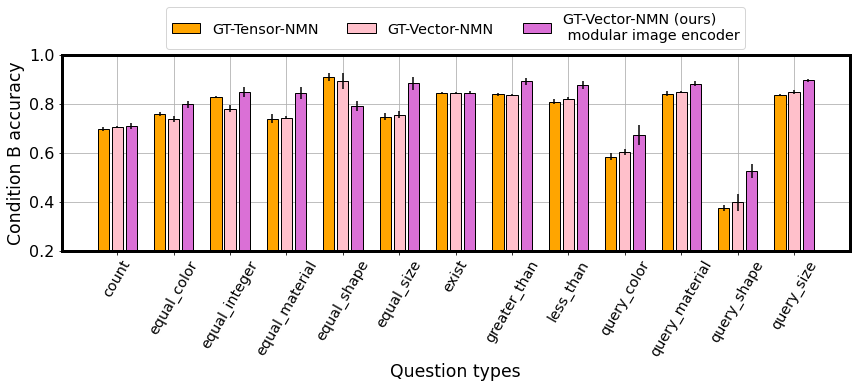

In [648]:
plt.rc('text', usetex=False)
plt.rc('axes', linewidth=3)

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=16)

fig, ax = plt.subplots(figsize=(12,6))
color_list = [# 'yellow',
    'orange', 'pink', 'orchid']
ax.grid(zorder=0)
for id_m_, (m_, a_) in enumerate(zip(method_list, accuracy_per_q_type)):
    plt.bar(np.arange((len(color_list)+1)*question_types.size, 
                      step=(len(color_list)+1)) +id_m_, 
            np.mean(a_, axis=-1), 
            yerr=np.std(a_, axis=-1),
            label=dict_method_names[id_m_], 
            color=color_list[id_m_], 
            zorder=2, edgecolor='black')
ax.set_xticks(np.arange((len(color_list)+1) *question_types.size, step=len(method_list)+1)+1)
ax.set_xticklabels(question_types, 
                   rotation=60, fontsize='x-large')
ax.set_xlabel('Question types', fontsize='xx-large')
ax.set_ylabel('Condition B accuracy', fontsize='xx-large')
plt.legend(fontsize="x-large", bbox_to_anchor=(0.5, 1.28), loc='upper center', 
           title_fontsize='x-large', ncol=len(dict_method_names))
plt.ylim([0.20,1])
#plt.title(r'$\bf{%s \ unseen \  split\ B}$' % data_name, fontsize='xx-large')
plt.tight_layout()

## CLOSURE

In [821]:
path_results_closure = join(root_results, 'CLEVR')

question_types = ['and_mat_spa', 'or_mat', 'or_mat_spa', 'embed_spa_mat', 
                  'embed_mat_spa', 'compare_mat', 'compare_mat_spa',
                  ]

In [822]:
model_list = ['tensor_0', 'vector_0']

performance = np.zeros((len(model_list), len(question_types)))

for id_m, m_ in enumerate(model_list):
    for id_q, q_ in enumerate(question_types):
        tmp_ = h5py.File(join(path_results_closure, '%s_output_%s_val.h5' %(m_, q_)), 'r')['correct']
        tmp_ = tmp_[:]
        performance[id_m, id_q] = tmp_.sum() / np.size(tmp_)

In [823]:
df_closure = pd.DataFrame(data=performance,
                          index=['Tensor-NMN', 'Vector-NMN'], 
                          columns=question_types)
df_closure

,and_mat_spa,or_mat,or_mat_spa,embed_spa_mat,embed_mat_spa,compare_mat,compare_mat_spa
Tensor-NMN,0.715278,0.551111,0.588056,0.931389,0.864167,0.920833,0.918889
Vector-NMN,0.854722,0.928056,0.901111,0.988889,0.985833,0.981944,0.980000


In [824]:
model_list = ['closure_vector_sep_stem/vector_sep_stem_%i' %k for k in range(5)]
# print(model_list)
performance = np.zeros((len(model_list), len(question_types)))

for id_m, m_ in enumerate(model_list):
    for id_q, q_ in enumerate(question_types):
        tmp_ = h5py.File(join(path_results_closure, '%s_output_%s_val.h5' %(m_, q_)), 'r')['correct']
        tmp_ = tmp_[:]
        performance[id_m, id_q] = tmp_.sum() / np.size(tmp_)

In [825]:
df_our_vector_nmn_closure = pd.DataFrame(data=performance,
                                         index=['our Vector-NMN rep %i' %(k+1) for k in range(5)], 
                                         columns=question_types)
df_our_vector_nmn_closure

,and_mat_spa,or_mat,or_mat_spa,embed_spa_mat,embed_mat_spa,compare_mat,compare_mat_spa
our Vector-NMN rep 1,0.630556,0.654722,0.591389,0.854444,0.920278,0.871667,0.866944
our Vector-NMN rep 2,0.679722,0.733889,0.681667,0.899167,0.948056,0.911389,0.915278
our Vector-NMN rep 3,0.675000,0.731389,0.699722,0.892222,0.955833,0.907222,0.915556
our Vector-NMN rep 4,0.671111,0.711111,0.667222,0.897222,0.941944,0.909722,0.913333
our Vector-NMN rep 5,0.631944,0.686667,0.621944,0.888889,0.935278,0.891667,0.897778


In [826]:
df_our_vector_nmn_closure.mean(axis=0)*100, df_our_vector_nmn_closure.std(axis=0)*100

(and_mat_spa        65.766667
 or_mat             70.355556
 or_mat_spa         65.238889
 embed_spa_mat      88.638889
 embed_mat_spa      94.027778
 compare_mat        89.833333
 compare_mat_spa    90.177778
 dtype: float64,
 and_mat_spa        2.431198
 or_mat             3.324839
 or_mat_spa         4.462489
 embed_spa_mat      1.831228
 embed_mat_spa      1.351154
 compare_mat        1.684282
 compare_mat_spa    2.082648
 dtype: float64)

In [812]:
(df_our_vector_nmn_closure.mean(axis=0)*100).values

array([65.76666667, 70.35555556, 65.23888889, 88.63888889, 94.02777778,
       89.83333333, 90.17777778])

In [827]:
accuracy_closure_mean = [np.array([64.9, 44.8, 47.9, 98.1, 79.3, 90.7, 91.2])/100,
                         np.array([86.3, 91.5, 88.6, 98.5, 98.7, 98.5, 98.4])/100,
                         (df_our_vector_nmn_closure.mean(axis=0)).values
                        ]
accuracy_closure_std = [np.array([2., 6.8, 5.8, 0.38, 0.83, 1.8, 1.9])/100,
                        np.array([2.5, 0.77, 1.2, 0.13, 0.19, 0.17, 0.3])/100,
                        (df_our_vector_nmn_closure.std(axis=0)).values
                        ]

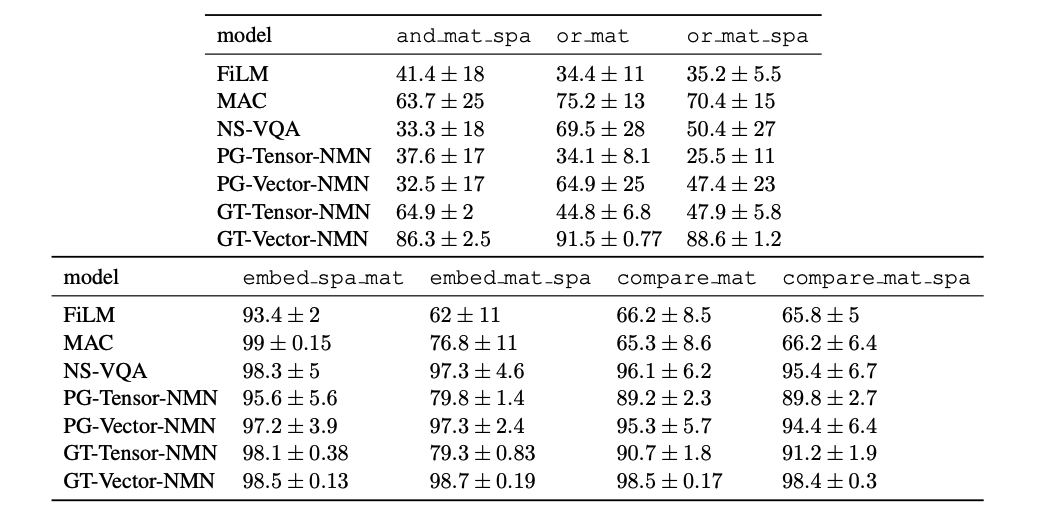

In [828]:
img = join(os.path.dirname(root_results), 'imgs/closure_results.png')
from IPython.display import Image
Image(img, width = 600, height = 300)

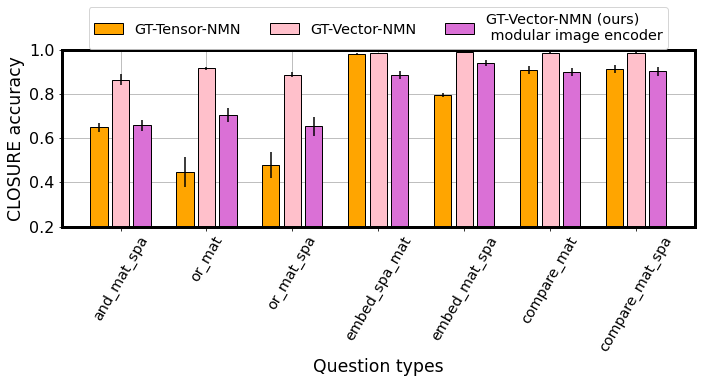

In [832]:
dict_method_names = ['GT-Tensor-NMN', 'GT-Vector-NMN', 
                     'GT-Vector-NMN (ours)\n modular image encoder']

plt.rc('text', usetex=False)
plt.rc('axes', linewidth=3)

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=16)

fig, ax = plt.subplots(figsize=(10,6))
color_list = ['orange', 'pink', 'orchid']
ax.grid(zorder=0)
for id_m_, (m_, a_mean, a_std) in enumerate(zip(dict_method_names, accuracy_closure_mean, accuracy_closure_std)):
    plt.bar(np.arange((len(color_list)+1)*len(question_types), 
                      step=(len(color_list)+1)) +id_m_, 
            a_mean, 
            yerr=a_std,
            label=dict_method_names[id_m_], 
            color=color_list[id_m_], 
            zorder=2, edgecolor='black')
ax.set_xticks(np.arange((len(color_list)+1) *len(question_types), step=len(dict_method_names)+1)+1)
ax.set_xticklabels(question_types, 
                   rotation=60, fontsize='x-large')
ax.set_xlabel('Question types', fontsize='xx-large')
ax.set_ylabel('CLOSURE accuracy', fontsize='xx-large')
plt.legend(fontsize="x-large", bbox_to_anchor=(0.5, 1.28), loc='upper center', 
           title_fontsize='x-large', ncol=len(dict_method_names))
plt.ylim([0.20,1])
plt.tight_layout()

### Others: loading data, models, etc.

In [834]:
# path_results = './results/CoGenT/MAC_0'  # stemmed
# execution_engine, ee_kwargs = load_execution_engine(path_results)

In [736]:
execution_engine

MAC(
  (stem): SequentialSaveActivations(
    (0): Conv2d(1026, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (InputUnit1): InputUnit(
    (question_transformer): Linear(in_features=512, out_features=512, bias=True)
  )
  (InputUnit2): InputUnit(
    (question_transformer): Linear(in_features=512, out_features=512, bias=True)
  )
  (InputUnit3): InputUnit(
    (question_transformer): Linear(in_features=512, out_features=512, bias=True)
  )
  (InputUnit4): InputUnit(
    (question_transformer): Linear(in_features=512, out_features=512, bias=True)
  )
  (InputUnit5): InputUnit(
    (question_transformer): Linear(in_features=512, out_features=512, bias=True)
  )
  (InputUnit6): InputUnit(
    (question_transformer): Linear(in_features=512, out_features=512, bias=True)
  )
  (InputUnit7): InputUnit(
    (question_transformer): Linear(in_features

In [76]:
torch.equal(execution_engine.count.impl.conv1.weight, execution_engine.equal_color.impl.conv1.weight)

False

In [78]:
execution_engine.equal_color.impl.conv1.weight

Parameter containing:
tensor([[[[ 1.5196e-02, -2.9182e-02, -7.5064e-03],
          [ 9.2787e-03, -4.4491e-03,  1.2298e-03],
          [ 1.8119e-03, -1.6710e-02,  1.7282e-02]],

         [[ 2.9607e-02, -1.0793e-02, -8.8966e-03],
          [ 4.7374e-02,  3.4533e-02, -2.5532e-02],
          [ 4.7967e-02,  1.8858e-02,  8.0480e-03]],

         [[-2.1935e-02, -4.6265e-02, -3.4533e-02],
          [-2.0217e-02, -3.3542e-02, -5.3566e-02],
          [ 1.8915e-02, -5.4797e-03, -1.2909e-02]],

         ...,

         [[ 1.3572e-02,  4.3281e-02,  6.7936e-03],
          [ 4.8007e-02,  3.7489e-02,  1.7792e-02],
          [ 1.9877e-02,  3.3042e-02,  2.1226e-04]],

         [[-2.7919e-02, -7.0055e-03, -5.0494e-02],
          [-4.2174e-02, -2.9849e-02, -3.4425e-02],
          [ 8.0611e-03, -1.2948e-02,  5.2804e-03]],

         [[-8.2292e-03, -3.6969e-02, -2.4810e-02],
          [-1.7211e-02, -1.0985e-02, -3.5706e-02],
          [-1.6861e-02, -4.8676e-02, -1.9997e-02]]],


        [[[ 1.0412e-02, -2.5797

In [72]:
execution_engine.equal_size.shared_film_module.conv0.weight

Parameter containing:
tensor([[[[-0.0485,  0.0176, -0.0469],
          [-0.0516,  0.0940, -0.0729],
          [-0.0087,  0.0706,  0.0383]],

         [[-0.0990, -0.0456,  0.0409],
          [-0.0147, -0.0004, -0.0235],
          [ 0.0008, -0.0377, -0.0081]],

         [[-0.0455, -0.0330, -0.0417],
          [-0.0336, -0.0305, -0.0180],
          [ 0.0079, -0.0215,  0.0059]],

         ...,

         [[-0.0374, -0.0297,  0.0050],
          [ 0.0309,  0.0011, -0.0123],
          [ 0.0102, -0.0266,  0.0059]],

         [[-0.0109, -0.0150,  0.0747],
          [-0.0324,  0.0158, -0.0223],
          [-0.0303, -0.0213, -0.0478]],

         [[ 0.0149, -0.0087,  0.0371],
          [-0.0509, -0.0453, -0.0223],
          [-0.1388, -0.0921,  0.0217]]],


        [[[ 0.0395, -0.1279, -0.0785],
          [-0.1132, -0.0754,  0.0156],
          [ 0.0132, -0.0458,  0.0523]],

         [[ 0.0091, -0.0586, -0.0499],
          [-0.0094, -0.0182, -0.0157],
          [-0.0121,  0.0529,  0.0222]],

         

In [71]:
execution_engine.equal_color.shared_film_module.conv0.weight

Parameter containing:
tensor([[[[-0.0485,  0.0176, -0.0469],
          [-0.0516,  0.0940, -0.0729],
          [-0.0087,  0.0706,  0.0383]],

         [[-0.0990, -0.0456,  0.0409],
          [-0.0147, -0.0004, -0.0235],
          [ 0.0008, -0.0377, -0.0081]],

         [[-0.0455, -0.0330, -0.0417],
          [-0.0336, -0.0305, -0.0180],
          [ 0.0079, -0.0215,  0.0059]],

         ...,

         [[-0.0374, -0.0297,  0.0050],
          [ 0.0309,  0.0011, -0.0123],
          [ 0.0102, -0.0266,  0.0059]],

         [[-0.0109, -0.0150,  0.0747],
          [-0.0324,  0.0158, -0.0223],
          [-0.0303, -0.0213, -0.0478]],

         [[ 0.0149, -0.0087,  0.0371],
          [-0.0509, -0.0453, -0.0223],
          [-0.1388, -0.0921,  0.0217]]],


        [[[ 0.0395, -0.1279, -0.0785],
          [-0.1132, -0.0754,  0.0156],
          [ 0.0132, -0.0458,  0.0523]],

         [[ 0.0091, -0.0586, -0.0499],
          [-0.0094, -0.0182, -0.0157],
          [-0.0121,  0.0529,  0.0222]],

         

In [52]:
vocab = ee_kwargs['vocab']

In [53]:
args = json_vector['args']
# args

In [54]:
scenes_needed = args['symbolic_ee']
features_needed = args['model_type'] != 'PG' and not args['symbolic_ee']

# scenes_needed, features_needed

In [55]:
question_families = None
if args['family_split_file'] is not None:
    with open(args['family_split_file'], 'r') as f:
        question_families = json.load(f)
            
# question_families